In [1]:
# Copied from github
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt
import seaborn as sns
import datetime
import calendar
import statistics
# Read the data from the file, and create a DataFrame object.
raw_data_movies = pd.read_csv("tmdb_5000_movies.csv")

# Reformat the columns contain dictionaries as a string list.
raw_data_movies["genres"] = raw_data_movies["genres"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["keywords"] = raw_data_movies["keywords"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_companies"] = raw_data_movies["production_companies"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_countries"] = raw_data_movies["production_countries"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["spoken_languages"] = raw_data_movies["spoken_languages"].apply(lambda x : [i["name"] for i in eval(x)])

# Read the data from the file, and create a DataFrame object.
raw_data_credits = pd.read_csv("tmdb_5000_credits.csv")

# Reformat the columns contain dictionaries as a string list.
raw_data_credits["cast"] = raw_data_credits["cast"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_credits["crew"] = raw_data_credits["crew"].apply(lambda x : [i["job"] + " : " + i["name"] for i in eval(x)])

# Merge two datasets base on the movies' id number, and drop the duplicated columns.
raw_data = pd.merge(raw_data_movies, raw_data_credits.drop("title", 1), left_on = "id", right_on = "movie_id").drop("movie_id", 1)

# Clean the dataset, and remove the outliers.
data = raw_data[(raw_data["budget"] > 0) &
                (raw_data["original_title"] is not np.nan) &
                (raw_data["popularity"] > 0) & 
                (raw_data["production_companies"].apply(len) != 0) &
                (raw_data["production_countries"].apply(len) != 0) & 
                (raw_data["release_date"] is not np.nan) &
                (raw_data["revenue"] > 0) &
                (raw_data["runtime"] > 0) &
                (raw_data["cast"].apply(len) != 0) & 
                (raw_data["crew"].apply(len) != 0)]

# Gets all genres in the dataset
unique_genre = {genre for l in data["genres"] for genre in l}

In [2]:
# My code starts here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import math

allX = {}
allY = {}
for ug in unique_genre:
    x = []
    y = []
    for l in range (0, len(data["genres"])):
        if (data["genres"].get(l) and data["revenue"].get(l) and ug in data["genres"].get(l)):
            x.append(math.log(data["budget"].get(l)))
            y.append(math.log(data["revenue"].get(l)))
    allX[ug] = x
    allY[ug] = y

Here we sort all values of budgets (X) and revenue (Y) into two dictionaries with key values of the specific genre and the values of budget or revenue as lists depending on dictionary. In this process, repeats of the same movie does occur since most movies have more than a single genre. Additionally, using these lists would better allow us to plot the scatter plot in the future. In hindsight after the first run, the points and the line's visualization did not give a good understanding of approximation, hence the application of Napier Logarithms permitted a better visualization of data. This is why the log budget and revenue is used.

In [3]:
for g in unique_genre:
    if allX.get(g) == []:
        allX.pop(g)
    if allY.get(g) == []:
        allY.pop(g)

Here, we make sure that all genres have budgets and revenues by discarding the entire genre since an empty list of budget and revenues would result in an empty scatter plot.

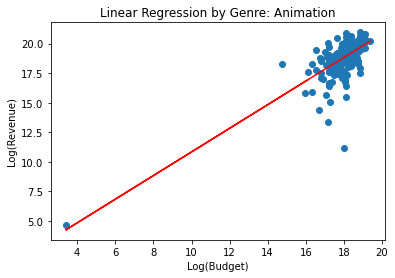

The Animation movie linear regression model is: Revenue = 0.9996253746508537 * Budget + 0.8440999753806153
Average MSE, for model #4: 3.195472169694911e+16
Average RMSE: 178.75883669611724 million



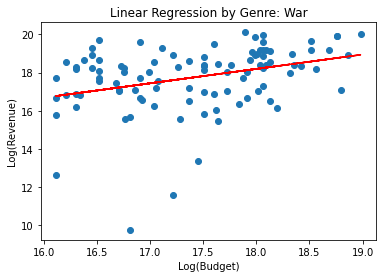

The War movie linear regression model is: Revenue = 0.7533500753430061 * Budget + 4.632812389028194
Average MSE, for model #4: 3.385051732448505e+16
Average RMSE: 183.98510082200963 million



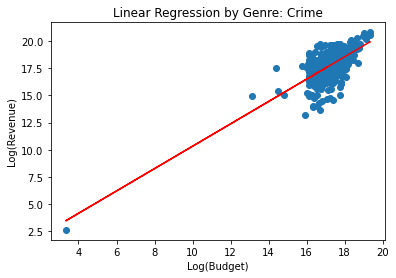

The Crime movie linear regression model is: Revenue = 1.0281119104877938 * Budget + 0.05093834362745042
Average MSE, for model #4: 3.3081974927700396e+16
Average RMSE: 181.88450986189122 million



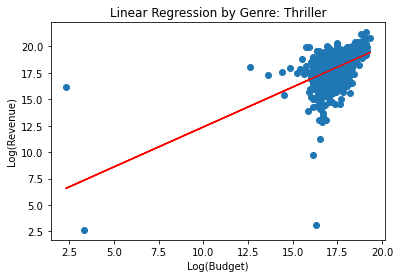

The Thriller movie linear regression model is: Revenue = 0.7550352027182395 * Budget + 4.8258111787455995
Average MSE, for model #4: 3.374119512209901e+16
Average RMSE: 183.68776530324226 million



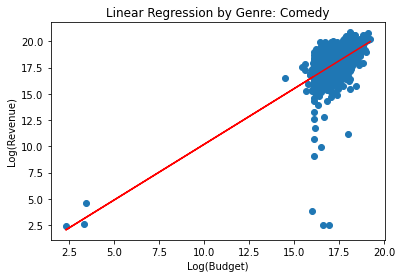

The Comedy movie linear regression model is: Revenue = 1.0603135683664549 * Budget + -0.4112974517280641
Average MSE, for model #4: 3.3210713173729376e+16
Average RMSE: 182.2380673013445 million



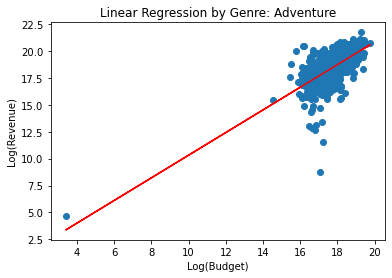

The Adventure movie linear regression model is: Revenue = 1.052670509615493 * Budget + -0.2041529481709965
Average MSE, for model #4: 3.2874986401539996e+16
Average RMSE: 181.31460614506486 million



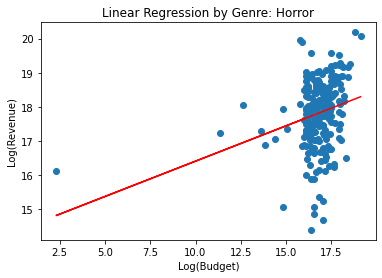

The Horror movie linear regression model is: Revenue = 0.20699599426696422 * Budget + 14.340269563947484
Average MSE, for model #4: 3.4713983478196436e+16
Average RMSE: 186.31688994344137 million



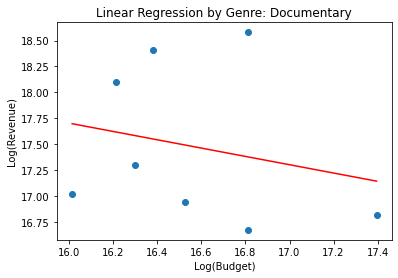

The Documentary movie linear regression model is: Revenue = -0.40035544983285326 * Budget + 24.10859408985679
Average MSE, for model #4: 3.780462850009947e+16
Average RMSE: 194.43412380572363 million



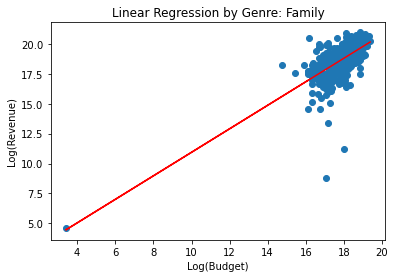

The Family movie linear regression model is: Revenue = 0.9822522774321161 * Budget + 1.1175693113031606
Average MSE, for model #4: 3.718273548540125e+16
Average RMSE: 192.82825385664117 million



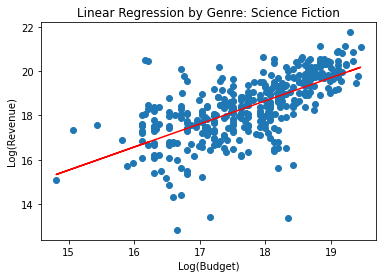

The Science Fiction movie linear regression model is: Revenue = 1.0416826093657396 * Budget + -0.09309070378832018
Average MSE, for model #4: 3.659963655393012e+16
Average RMSE: 191.31031481321156 million



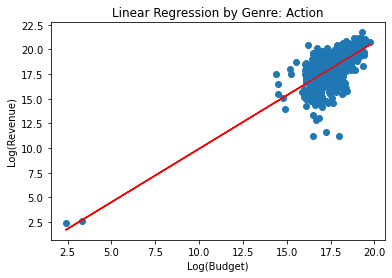

The Action movie linear regression model is: Revenue = 1.0833032120928778 * Budget + -0.9009172232818798
Average MSE, for model #4: 3.6069471296931656e+16
Average RMSE: 189.9196443155148 million

Average MSE, for model #4: 3.6069471296931656e+16
Average RMSE: 189.9196443155148 million



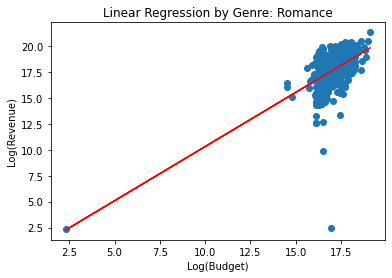

The Romance movie linear regression model is: Revenue = 1.044478813983378 * Budget + -0.13285509357041292
Average MSE, for model #4: 3.5673025142332812e+16
Average RMSE: 188.87303974451413 million



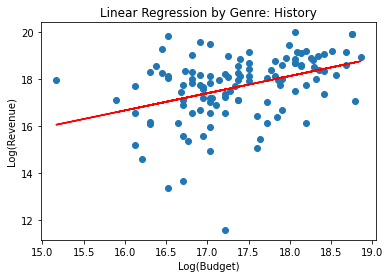

The History movie linear regression model is: Revenue = 0.7306690597077001 * Budget + 4.980669121426153
Average MSE, for model #4: 3.5707246530631532e+16
Average RMSE: 188.9636116574605 million



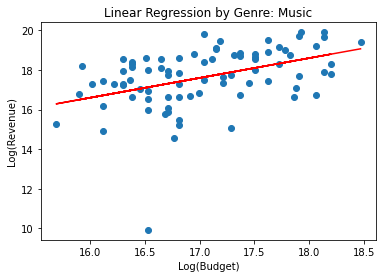

The Music movie linear regression model is: Revenue = 0.9997381342871279 * Budget + 0.6080134153163286
Average MSE, for model #4: 3.5439092330662636e+16
Average RMSE: 188.25273525413286 million



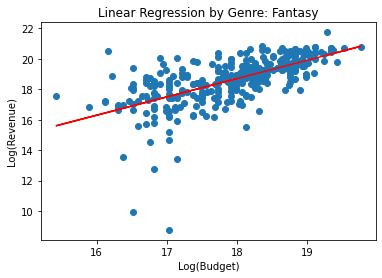

The Fantasy movie linear regression model is: Revenue = 1.2045125377912622 * Budget + -2.974201891438412
Average MSE, for model #4: 3.5019136155701572e+16
Average RMSE: 187.13400587734333 million



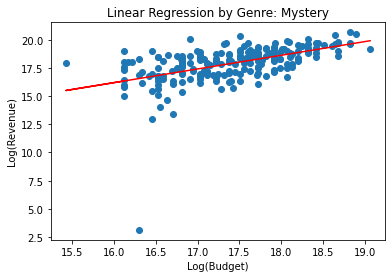

The Mystery movie linear regression model is: Revenue = 1.2132649141311718 * Budget + -3.2207001264247346
Average MSE, for model #4: 3.4644587990564404e+16
Average RMSE: 186.13056705056374 million



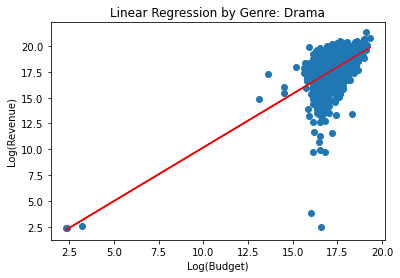

The Drama movie linear regression model is: Revenue = 1.0374826098906231 * Budget + -0.19515802100759316
Average MSE, for model #4: 3.4454399159422244e+16
Average RMSE: 185.61896228408952 million



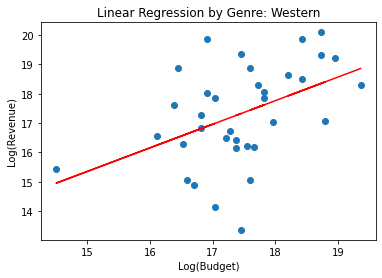

The Western movie linear regression model is: Revenue = 0.8050776197153847 * Budget + 3.2734492825158608
Average MSE, for model #4: 3.4479875722225756e+16
Average RMSE: 185.687575573127 million

Average MSE across all genres is 3.680952212719636e+16
Average RMSE across all genres is 197.0699030344971 million


In [14]:
coef = []
intercept = []
MSE = []
sum_MSE = 0
sum_RMSE = 0

for g in unique_genre:
    if(allX.get(g) and allY.get(g)):
        # Gets all coordinates for x and y 
        x = np.array(allX.get(g)).reshape((-1, 1))
        y = np.array(allY.get(g))
        # Creates LinearRegression object
        m4 = LinearRegression()
        m4.fit(x,y)
        # Creates regression line based off coordinates
        y_pred = m4.predict(x)
        pyplt.scatter(x,y)
        # Labels and organization
        pyplt.plot(x, y_pred, color="red")
        pyplt.xlabel("Log(Budget)")
        pyplt.ylabel("Log(Revenue)")
        title = "Linear Regression by Genre: " + g
        pyplt.title(title)
        pyplt.show()
    
        # Gets variables for solving RMSE and MSE
        m4 = m4.fit(x,y)
        coef.append(m4.coef_[0])
        intercept.append(m4.intercept_)
        predictions = m4.predict(data["budget"].to_numpy().reshape(-1, 1))
        MSE.append(np.mean((data["revenue"] - predictions) ** 2))
        m4coef_ = np.array([np.mean(coef)])
        m4intercept_ = np.mean(intercept)
        print("The " + g + " movie linear regression model is: Revenue = " + str(m4.coef_[0]) + " * Budget + " + str(m4.intercept_))
        
    MSE_average = np.mean(MSE)
    print("Average MSE, for model #4:", MSE_average)
    print("Average RMSE:", MSE_average ** 0.5 / 1000000, 'million\n')
    sum_RMSE += MSE_average ** 0.5 / 1000000
    sum_MSE += MSE_average
    
    
print("Average MSE across all genres is " +str(sum_MSE/len(allX)))
print("Average RMSE across all genres is " +str(sum_RMSE/len(allX)) + " million")

Since we have so many genres, we loop through all key values of both dictionaries to plot the scatterplot as well as labeling both axises and the name of the plot. Additionally, we use the loop to calculate the MSE as well as the RMSE to visualize the accuracy of the models. As demonstrated by the above data, average MSE and average RMSE of each genre are about 1.86e+16 and 140 million respectively. With this information and the information from other models, we can determine that the MSE and RMSE are medicore to poor. To improve on this, one method can be to remove all outliers so the distance between predicted and actual values are less drastic, in other words resulting in smaller MSE and RMSE. Moreover, with this result, this is an example of a linear regression algorithmm which sorts the data into categories to achieve a better idea of what the revenue would be like per genre since each genre's basis of revenue and budget is different. This is much like how spliting the demographic of an out of school income by major would give a better idea of how much a student is suppose to earn compared to an average for the entire school.

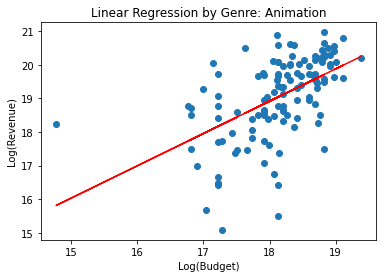

The final linear model is: Revenue = 0.9603179223160537 * Budget + 1.6298299057703467
Average MSE: 2.685737071848847e+16


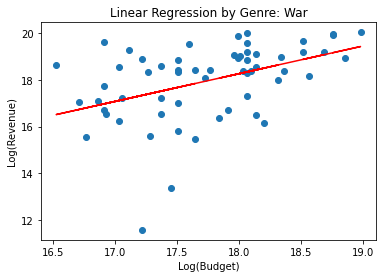

The final linear model is: Revenue = 1.070826513725681 * Budget + -0.6886449931606471
Average MSE: 2.5412369207316144e+16


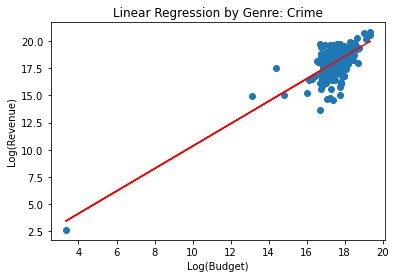

The final linear model is: Revenue = 1.0579124008108032 * Budget + -0.45388755417435195
Average MSE: 2.556814974689992e+16


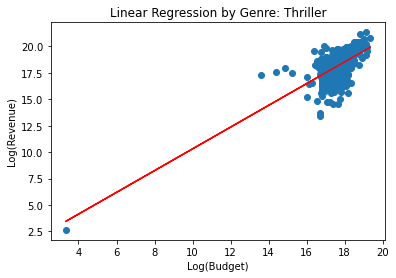

The final linear model is: Revenue = 1.0506859782294984 * Budget + -0.3359559174759523
Average MSE: 2.565632731560241e+16


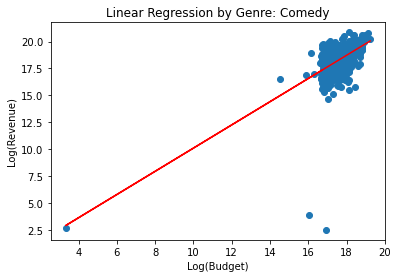

The final linear model is: Revenue = 1.0563815030613233 * Budget + -0.408249600276406
Average MSE: 2.5576833551256084e+16


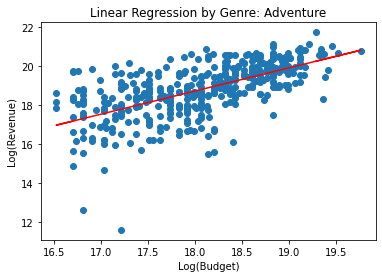

The final linear model is: Revenue = 1.0788907941868007 * Budget + -0.7925063897674652
Average MSE: 2.528799936731597e+16


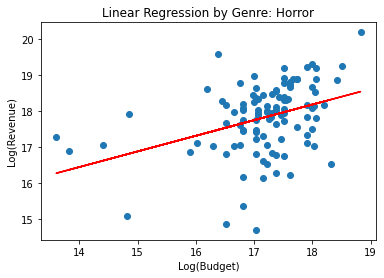

The final linear model is: Revenue = 0.986815591537043 * Budget + 0.8007659771513796
Average MSE: 2.6700333793032892e+16


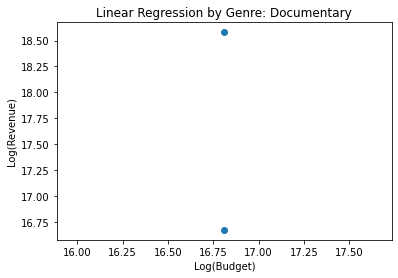

The final linear model is: Revenue = 0.8634636425949127 * Budget + 2.9040249980387243
Average MSE: 2.8809232750160068e+16


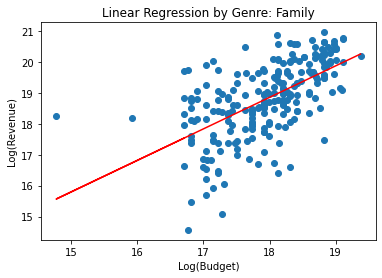

The final linear model is: Revenue = 0.8808124428970597 * Budget + 2.637520971554192
Average MSE: 2.8502321378514144e+16


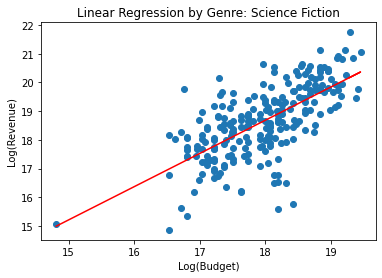

The final linear model is: Revenue = 0.9084222203389786 * Budget + 2.1599840887445163
Average MSE: 2.8079004238411596e+16


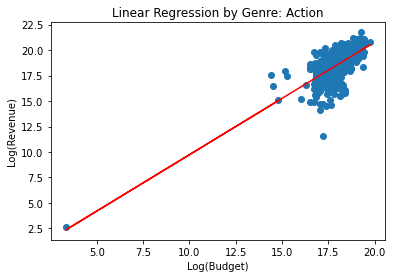

The final linear model is: Revenue = 0.9263966482556731 * Budget + 1.8426155827202495
Average MSE: 2.779095115915275e+16


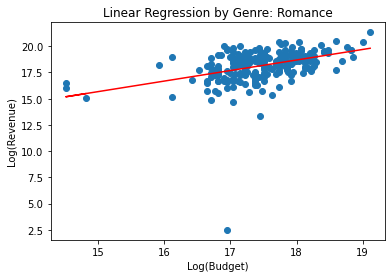

The final linear model is: Revenue = 0.9328987444897736 * Budget + 1.7398371022441743
Average MSE: 2.7662711907980004e+16


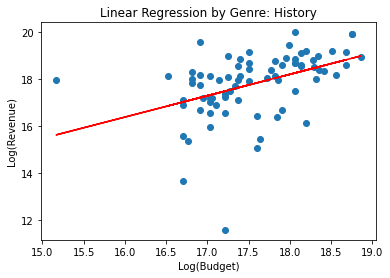

The final linear model is: Revenue = 0.9309497810541785 * Budget + 1.7496392588879037
Average MSE: 2.765789757220889e+16


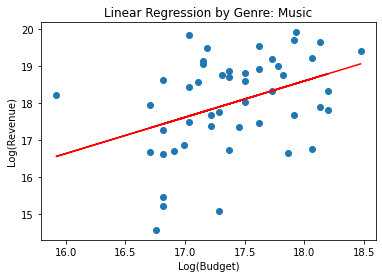

The final linear model is: Revenue = 0.9345189029373957 * Budget + 1.691431833935179
Average MSE: 2.7580396597846336e+16


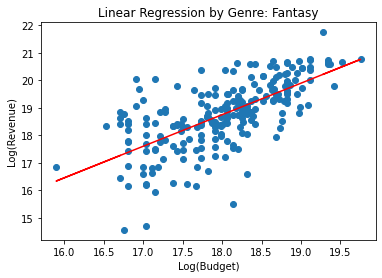

The final linear model is: Revenue = 0.9485613861219142 * Budget + 1.454659409800064
Average MSE: 2.7369432553684484e+16


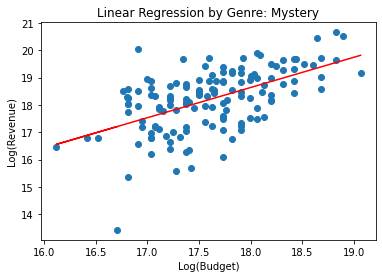

The final linear model is: Revenue = 0.9584885631359228 * Budget + 1.2827944212505147
Average MSE: 2.721473907738517e+16


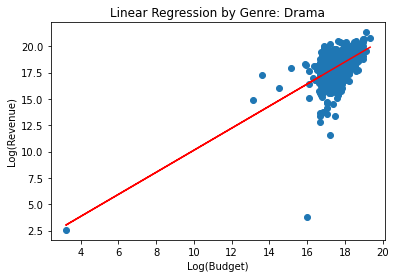

The final linear model is: Revenue = 0.9637723686356431 * Budget + 1.186457314161193
Average MSE: 2.712351076623051e+16


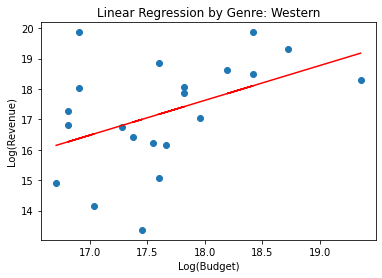

The final linear model is: Revenue = 0.9738247987073712 * Budget + 0.9550482808189196
Average MSE: 2.6973396336923268e+16


In [21]:
coef = []
intercept = []
MSE = []
sum_MSE = 0
sum_RMSE = 0

# Create a LinearRegressin Object
m4 = LinearRegression()

train, test = train_test_split(data)
xTrain = {}
yTrain = {}
for ug in unique_genre:
    x = []
    y = []
    for l in range (0, len(train["genres"])):
        if (train["genres"].get(l) and train["revenue"].get(l) and ug in train["genres"].get(l)):
            x.append(math.log(train["budget"].get(l)))
            y.append(math.log(train["revenue"].get(l)))
    xTrain[ug] = x
    yTrain[ug] = y

xTest = {}
yTest = {}
for ug in unique_genre:
    x = []
    y = []
    for l in range (0, len(test["genres"])):
        if (test["genres"].get(l) and test["revenue"].get(l) and ug in test["genres"].get(l)):
            x.append(math.log(test["budget"].get(l)))
            y.append(math.log(test["revenue"].get(l)))
    xTest[ug] = x
    yTest[ug] = y
    
for g in unique_genre:
    if (xTrain.get(g) and yTrain.get(g)):
        x = np.array(xTrain.get(g)).reshape((-1, 1))
        y = np.array(yTrain.get(g))
        m4 = m4.fit(x,y)
        # Creates regression line based off coordinates
        y_pred = m4.predict(x)
        pyplt.scatter(x,y)
        # Labels and organization
        pyplt.plot(x, y_pred, color="red")
        pyplt.xlabel("Log(Budget)")
        pyplt.ylabel("Log(Revenue)")
        title = "Linear Regression by Genre: " + g
        pyplt.title(title)
        pyplt.show()
        coef.append(m4.coef_[0])
        intercept.append(m4.intercept_)
        predictions = m4.predict(test["budget"].to_numpy().reshape(-1,1))
        MSE.append(np.mean((test["revenue"] - predictions) ** 2))
        
        
        
        # Use the average of the value of slope (coefficient) as the slope of the fianl model.
        m4.coef_ = np.array([np.mean(coef)])
        # Use the average of the value of intercept as the intercept of the fianl model.
        m4.intercept_ = np.mean(intercept)
        # Print the final linear regression model.
        print("The final linear model is: Revenue = " + str(m4.coef_[0]) + " * Budget + " + str(m4.intercept_))
        # Calculate the average of each linear regression model's MSE in the loop.
        MSE_average = np.mean(MSE)
        # Print out the average.
        print("Average MSE:", MSE_average)
        





Here we have cross-validation using the applications of kfolding. As a result of kfolding and cross validation, the average MSE and average RMSE has decreased slightly but not by much hence rendering this an unsuccessful altercation. The cross validation results to around 1.82e+16 and 138 million respectively.

In [13]:
train, test = train_test_split(data)
train

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2853,12000000,"[Action, Thriller, Crime]",NaN,1948,"[poison, helicopter, assassin, nudity, hitman,...",en,Crank,Professional assassin Chev Chelios learns his ...,47.992817,"[Lions Gate Films, Lakeshore Entertainment, Gr...",...,42931041,88.0,"[English, Español, 한국어/조선말]",Released,There are a thousand ways to raise your adrena...,Crank,6.6,1151,"[Jason Statham, Amy Smart, Jose Pablo Cantillo...","[Producer : Tom Rosenberg, Music : Paul Haslin..."
1863,25000000,[Drama],http://movies.disney.com/million-dollar-arm,198185,"[baseball, sport, duringcreditsstinger]",en,Million Dollar Arm,"In a last-ditch effort to save his career, spo...",17.312433,[Walt Disney Pictures],...,38307627,124.0,"[हिन्दी, English]",Released,"Sometimes to win, sometimes you have to change...",Million Dollar Arm,6.6,259,"[Jon Hamm, Bill Paxton, Lake Bell, Suraj Sharm...","[Screenplay : Tom McCarthy, Director : Craig G..."
2053,22000000,"[Romance, Drama, History, War, Music]",NaN,11661,"[holiday, world war i, hostility, singer, sing...",fr,Joyeux Noël,"In 1914, World War I, the bloodiest war ever a...",13.960945,"[Senator Film Produktion, Media Pro Pictures, ...",...,17709155,116.0,"[English, Français, Deutsch, Latin]",Released,France 1914. A moment of humanity that made hi...,Joyeux Noël,7.2,212,"[Diane Kruger, Natalie Dessay, Benno Fürmann, ...","[Casting : Susie Figgis, Camera Operator : Jea..."
1699,60000000,"[Crime, Mystery, Thriller, Action]",NaN,2043,"[psychology, police operation, police, psychol...",en,Along Came a Spider,When a teacher kidnaps a girl from a prestigio...,21.252797,"[Paramount Pictures, AZL Productions KG, David...",...,105178561,104.0,"[English, Pусский]",Released,The game is far from over.,Along Came a Spider,6.1,400,"[Morgan Freeman, Monica Potter, Michael Wincot...","[Casting : Denise Chamian, Original Music Comp..."
1375,35000000,"[Adventure, Comedy, Family]",http://disney.go.com/disneypictures/skyhigh/,11459,"[hero, loyalty, mockery, supernatural powers, ...",en,Sky High,Set in a world where superheroes are commonly ...,11.041659,"[Walt Disney Pictures, Gunn Films, Max Strongh...",...,86369815,100.0,[English],Released,Saving The World... One Homework Assignment At...,Sky High,5.8,550,"[Michael Angarano, Kurt Russell, Kelly Preston...","[Director of Photography : Shelly Johnson, Cos..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,25530000,"[Adventure, Family]",NaN,36355,"[dolphin, florida, florida keys, summer]",en,Flipper,"Sandy Ricks is sent by his mom to Coral Key, a...",4.475007,"[Universal Pictures, The Bubble Factory, Ameri...",...,20080020,95.0,[English],Released,This summer it's finally safe to go back in th...,Flipper,5.3,84,"[Elijah Wood, Paul Hogan, Jonathan Banks, Jaso...","[Screenplay : Alan Shapiro, Director : Alan Sh..."
454,80000000,"[Drama, Science Fiction, Thriller]",NaN,10200,"[extraterrestrial technology, spacecraft, ulti...",en,The Day the Earth Stood Still,A representative of an alien race that went th...,41.890722,"[Twentieth Century Fox Film Corporation, Dune ...",...,233093859,104.0,"[普通话, English]",Released,12.12.08 is the Day the Earth Stood Still,The Day the Earth Stood Still,5.2,1043,"[Keanu Reeves, Jennifer Connelly, Kathy Bates,...","[Casting : Heike Brandstatter, Casting : Coree..."
2997,10000000,"[Horror, Mystery, Thriller]",http://theboymovie.tumblr.com/,321258,"[suicide, england, fire, country house, shower...",en,The Boy,"A nanny, working for a family whose son has ju...",38.179483,"[Lakeshore Entertainment, Vertigo Entertainmen...",...,64188367,97.0,[English],Released,Every child needs to feel loved.,The Boy,5.8,1102,"[Lauren Cohan, Rupert Evans, James Russell, Ji...","[Producer : Tom Rosenberg, Editor : Brian Berd..."
212,125000000,"[Action, Adven